# Homework 4: Graph Spectra

### How to Build and Run

1. Install Jupyter Notebook.
2. Open this file in Jupyter Notebook.
3. Press "run all".

### Implementation

We generally follow the pseudo algorithm described in the paper [On Spectral Clustering: Analysis and an algorithm](http://ai.stanford.edu/~ang/papers/nips01-spectral.pdf). We use the networkx library to store the graph, and use numpy and sklearn to store the matrix and do calculations. Finally, we use matplotlib to visualize the results.

Below are the code for our implementation:

#### Install and Import the Libraries.

In [ ]:
! pip install numpy
! pip install networkx
! pip install scikit-learn
! pip install matplotlib

In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 

#### Load the 2 Graphs

In [3]:
graph1_path = "../dataset/example1.dat"
graph2_path = "../dataset/example2.dat"

graph1 = nx.read_edgelist(path=graph1_path, delimiter=',')
graph2 = nx.read_weighted_edgelist(path=graph2_path, delimiter=',')

C:\Users\10656\AppData\Local\Temp\ipykernel_19500\343703851.py:7: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A1 = np.array(nx.adjacency_matrix(graph1).todense())
C:\Users\10656\AppData\Local\Temp\ipykernel_19500\343703851.py:8: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A2 = np.array(nx.adjacency_matrix(graph2).todense())


#### Visualization of the graph data

We draw the 2 graphs beforehand, to choose the $k$ value.

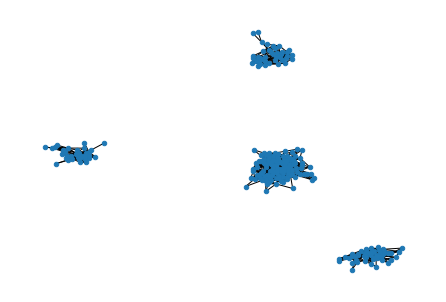

In [4]:
nx.draw(graph1, node_size=20) # intuitively, k1 = 4

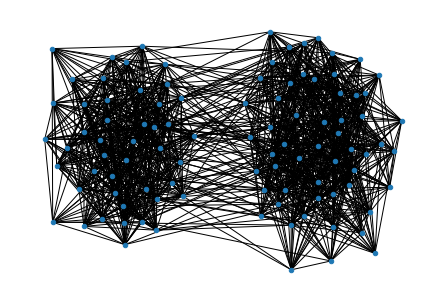

In [5]:
nx.draw(graph2, node_size=20) # intuitively, k2 = 2

In [6]:
k1, k2 = 4, 2

#### Implementation of the Algorithm

Here's the detailed implementation of the algorithm. Notice that the first step is different from the paper, as the data format is different. We directly use the adjacency matrix of the graph as $A$.

In [7]:
A1 = np.array(nx.adjacency_matrix(graph1).todense())
A2 = np.array(nx.adjacency_matrix(graph2).todense())

D1 = np.diagflat(np.sum(A1, axis=0))
D1_inv = np.linalg.inv(np.sqrt(D1))
D2 = np.diagflat(np.sum(A2, axis=0))
D2_inv = np.linalg.inv(np.sqrt(D2))

L1 = D1_inv @ A1 @ D1_inv
L2 = D2_inv @ A2 @ D2_inv

In [8]:
l1, v1 = np.linalg.eigh(L1)
l2, v2 = np.linalg.eigh(L2)

In [9]:
X1 = v1[:, -k1:]
X2 = v2[:, -k2:]

In [10]:
Y1 = X1 / np.linalg.norm(X1, axis=1, keepdims=True)
Y2 = X2 / np.linalg.norm(X2, axis=1, keepdims=True)

In [11]:
res1 = KMeans(n_clusters=k1, n_init='auto').fit(Y1).labels_
res2 = KMeans(n_clusters=k2, n_init='auto').fit(Y2).labels_

#### Visualization of the Results

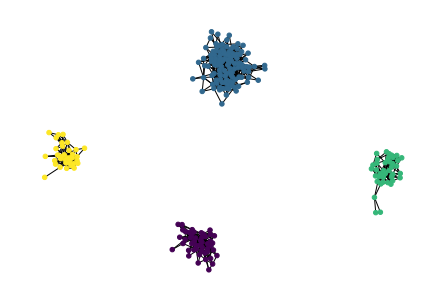

In [12]:
# visualization of clustering results of graph 1

nx.draw(graph1, node_size=20, node_color=res1)

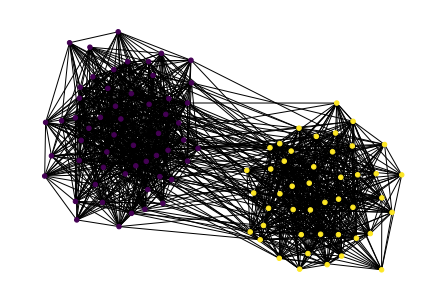

In [13]:
# visualization of clustering results of graph 2

nx.draw(graph2, node_size=20, node_color=res2)

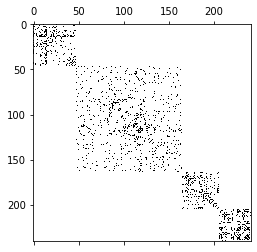

In [14]:
# The adjacency matrix of graph 1, it's clear that there are 4 different groups of data

order1 = np.argsort(res1)
A1_rearranged = A1[order1, :][:, order1]
plt.spy(A1_rearranged)
plt.show()

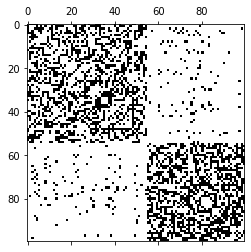

In [15]:
# The adjacency matrix of graph 2

order2 = np.argsort(res2)
A2_rearranged = A2[order2, :][:, order2]
plt.spy(A2_rearranged)
plt.show()